In [0]:
%tensorflow_version 1.x
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D
from keras.optimizers import Adam
from keras.models import  Sequential
from keras.regularizers import l1_l2

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
from sklearn.metrics import confusion_matrix
from keras.utils.np_utils import to_categorical
from keras import optimizers

In [37]:
digits=load_digits()
print(digits.keys())
print(digits.DESCR)

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])
.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping 

In [38]:
print(digits.images.shape)
print(digits.data.shape)

(1797, 8, 8)
(1797, 64)


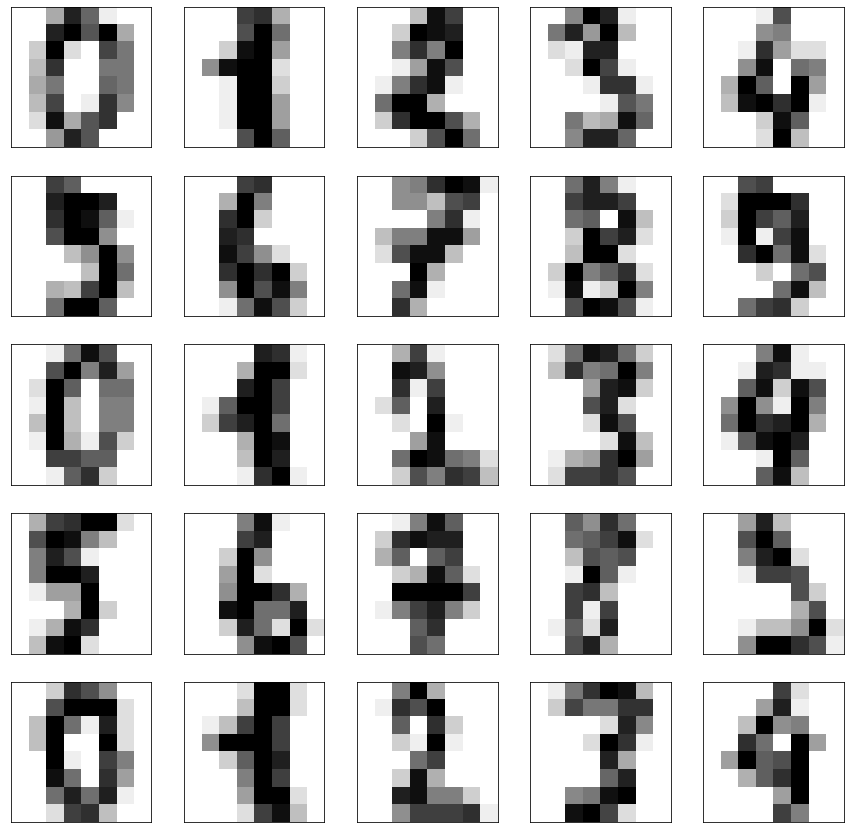

In [39]:
plt.figure(figsize=(15,15))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(digits.images[i], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

In [0]:
# Create feature and target arrays
X_data = digits.images
y_data = digits.target

In [0]:
# reshape X_data into 3-D format
# note that this follows image format of Tensorflow backend
X_data = X_data.reshape((X_data.shape[0], X_data.shape[1], X_data.shape[2], 1))
# one-hot encoding of y_data
y_data = to_categorical(y_data)

In [0]:
# partition data into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.3, random_state = 777)

In [0]:
model = Sequential()

In [0]:
# convolution layer
model.add(Conv2D(input_shape = (X_data.shape[1], X_data.shape[2], X_data.shape[3]), filters = 10, kernel_size = (3,3), strides = (1,1), padding = 'valid'))
# activation layer before pooling
model.add(Activation('relu'))
# pooling layer
model.add(MaxPooling2D(pool_size = (2,2)))
# prior layer should be flattend to be connected to dense layers
model.add(Flatten())
# dense layer with 50 neurons
model.add(Dense(50, activation = 'relu'))
# final layer with 10 neurons to classify the instances
model.add(Dense(10, activation = 'softmax'))

adam = optimizers.Adam(lr = 0.001)

In [0]:
model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])

history = model.fit(X_train, y_train, batch_size = 50, validation_split = 0.2, epochs = 100, verbose = 0)

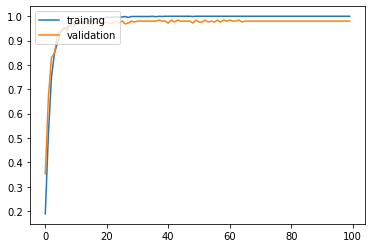

In [46]:
 plt.plot(history.history['accuracy'])
 plt.plot(history.history['val_accuracy'])
 plt.legend(['training', 'validation'], loc = 'upper left')
 plt.show()

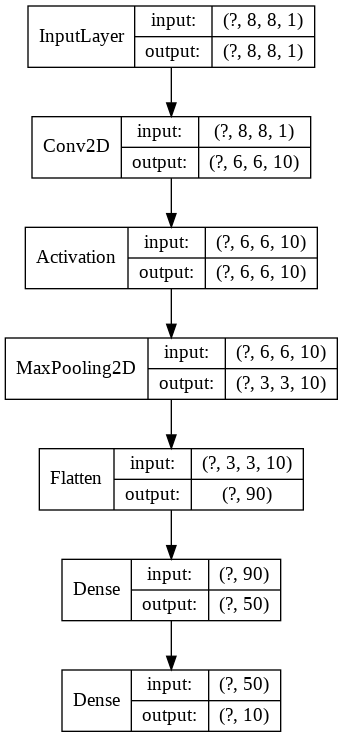

In [47]:
tf.keras.utils.plot_model(model,show_shapes=True,show_layer_names=False)

In [48]:
results = model.evaluate(X_test, y_test)
print('Test accuracy: ', results[1])

540/540 [==============================] - 0s 41us/step
Test accuracy:  0.9759259223937988


In [49]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 6, 6, 10)          100       
_________________________________________________________________
activation_3 (Activation)    (None, 6, 6, 10)          0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 3, 3, 10)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 90)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 50)                4550      
_________________________________________________________________
dense_6 (Dense)              (None, 10)                510       
Total params: 5,160
Trainable params: 5,160
Non-trainable params: 0
____________________________________________________

In [82]:
incorrect=np.nonzero(predicted_classes!=y_test)[0]
incorrect.size

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """Entry point for launching an IPython kernel.


1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """Entry point for launching an IPython kernel.


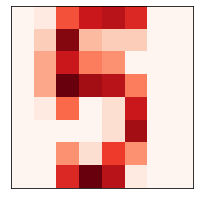

In [80]:
incorrect=np.nonzero(predicted_classes!=y_test)[0]
plt.figure(figsize=(15,8))
for j, incorrect in enumerate(incorrect[0:8]):
  plt.subplot(2,4,j+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(X_test[incorrect].reshape(8,8),cmap="Reds")